# Iris Dataset

In [27]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
import seaborn as sns

from ibex import trans
from ibex.sklearn import linear_model as pd_linear_model
from ibex.sklearn import decomposition as pd_decomposition
from ibex.sklearn import preprocessing as pd_preprocessing

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [31]:
iris = datasets.load_iris()
features = iris['feature_names']
iris = pd.DataFrame(
    np.c_[iris['data'], iris['target']], 
    columns=features+['class'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [35]:
iris, iris_te = model_selection.train_test_split(iris, stratify=iris['class'], test_size=0.1)

In [46]:
iris['class']

11     0.0
111    2.0
28     0.0
88     1.0
49     0.0
42     0.0
103    2.0
31     0.0
13     0.0
66     1.0
25     0.0
114    2.0
12     0.0
91     1.0
135    2.0
56     1.0
21     0.0
146    2.0
29     0.0
3      0.0
67     1.0
71     1.0
112    2.0
79     1.0
86     1.0
22     0.0
115    2.0
27     0.0
80     1.0
7      0.0
      ... 
98     1.0
141    2.0
20     0.0
145    2.0
23     0.0
9      0.0
130    2.0
0      0.0
148    2.0
34     0.0
59     1.0
78     1.0
132    2.0
140    2.0
119    2.0
87     1.0
93     1.0
70     1.0
24     0.0
89     1.0
68     1.0
73     1.0
52     1.0
127    2.0
61     1.0
110    2.0
95     1.0
149    2.0
83     1.0
129    2.0
Name: class, Length: 100, dtype: float64

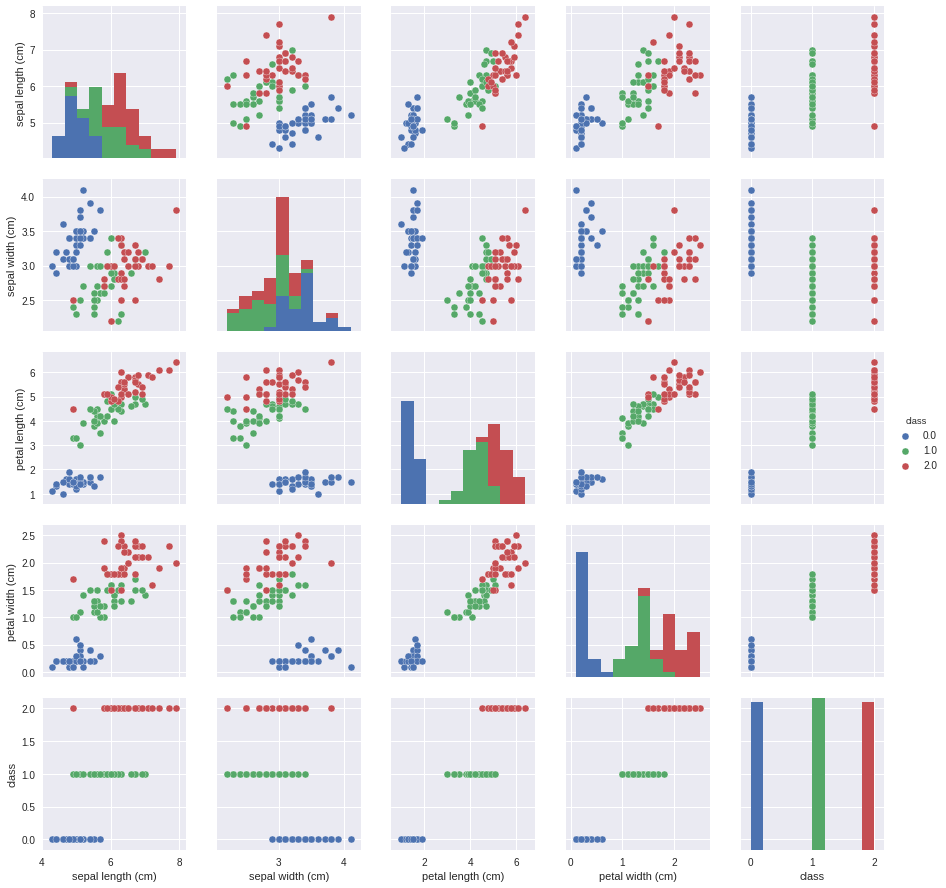

In [47]:
sns.pairplot(iris, 'class');

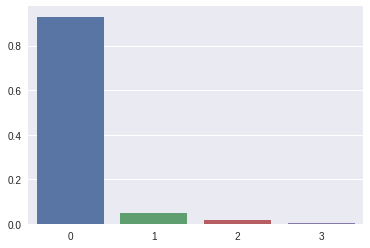

In [48]:
sns.barplot(
    data=pd.DataFrame(pd_decomposition.PCA().fit(iris[features]).explained_variance_ratio_).T);

In [50]:
decomp = trans(
    {('pc2', 'pc2'): pd_decomposition.PCA(n_components=2)}, 
    columns=features)

In [53]:
pca = decomp.fit_transform(iris)
pca['class'] = iris['class']
sns.lmplot('pc1', 'pc2', data=pca, hue='class');

KeyError: "['pc1'] not in index"

In [44]:
decomp

0     0.0
1     0.0
2     NaN
3     0.0
4     NaN
5     0.0
6     NaN
7     0.0
8     0.0
9     0.0
10    NaN
11    0.0
12    0.0
13    0.0
14    NaN
15    NaN
16    NaN
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    NaN
27    0.0
28    0.0
29    0.0
     ... 
70    1.0
71    1.0
72    NaN
73    1.0
74    NaN
75    NaN
76    NaN
77    1.0
78    1.0
79    1.0
80    1.0
81    NaN
82    NaN
83    1.0
84    1.0
85    1.0
86    1.0
87    1.0
88    1.0
89    1.0
90    1.0
91    1.0
92    1.0
93    1.0
94    1.0
95    1.0
96    NaN
97    NaN
98    1.0
99    NaN
Name: class, Length: 100, dtype: float64

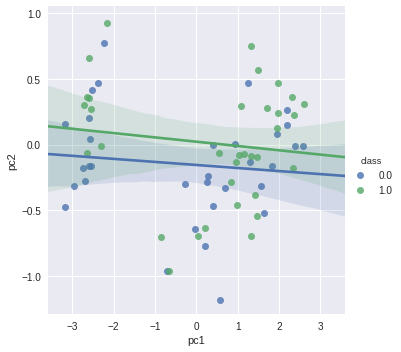

In [43]:
from sklearn import decomposition

decomp = decomposition.PCA(n_components=2)
pca = decomp.fit_transform(iris[features])
pca = pd.DataFrame(pca)
pca.columns=['pc1', 'pc2']
pca['class'] = iris['class']
sns.lmplot('pc1', 'pc2', data=pca, hue='class');

In [22]:
clf = decomp | pd_linear_model.LogisticRegression()
clf

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [16]:
model_selection.cross_val_score(
    clf,
    X=iris,
    y=iris['class'])

array([ 0.82051282,  0.86486486,  0.91666667])